# load calour

In [12]:
import calour as ca
% matplotlib notebook

we want to get info messages (10 is debug, 20 is info, 30 is warning)

In [ ]:
ca.set_log_level(20)

# Load the dataset
It is an amplicon experiment, so we use `load_amplicon`. This gives us some more amplicon experiment specific functions and defaults (i.e. plotting by taxonomy, etc.)

We load the biom table and mapping file.

Specify normalization depth to 10000 reads/sample

And filter away samples with < 1000 reads

By default the data is loaded as sparse scipy matrix. Can use dense instead by setting `sparse=False`

In [3]:
exp = ca.read_amplicon('data/egypt.biom', 'data/egypt.sample.txt', normalize=10000, filter_reads=1000)

2017-03-03 10:51:51 INFO loaded 42 samples, 4658 observations
2017-03-03 10:51:51 INFO 42 remaining


In [5]:
exp

AmpliconExperiment egypt.biom with 42 samples, 4658 features

## An Experiment (which AmpliconExperiment is a subclass) contains 3 basic attributes:
- data : an S (number samples) x F (number features) 2d numpy array or scipy.Sparse matrix
- sample_metadata : pandas.DataFrame. Stores all the per-sample information. Index is the SampleID
- feature_metadata : pandas.DataFrame. Stores all the per-feature information. For AmpliconExperiment, index is the sequence

Data, sample_metadata and feature_metadata are synchronized, so position (s,f) in the data matrix corresponds to position s in the sample_metadata and position f in the feature_metadata

In [9]:
exp_c.sample_metadata.columns

Index(['#SampleID', 'BioSample_s', 'Experiment_s', 'Library_Name_s',
       'LoadDate_s', 'MBases_l', 'MBytes_l', 'Run_s', 'SRA_Sample_s',
       'Sample_Name_s', 'collection_date_s', 'geo_loc_name_s',
       'host_subject_id_s', 'lat_lon_s', 'Assay_Type_s', 'AssemblyName_s',
       'BioProject_s', 'BioSampleModel_s', 'Center_Name_s', 'Consent_s',
       'InsertSize_l', 'LibraryLayout_s', 'LibrarySelection_s',
       'LibrarySource_s', 'Organism_s', 'Platform_s', 'ReleaseDate_s',
       'SRA_Study_s', 'env_biome_s', 'env_feature_s', 'env_material_s',
       'g1k_analysis_group_s', 'g1k_pop_code_s', 'host_s', 'source_s',
       '_calour_original_abundance'],
      dtype='object')

# Analysis

## Cluster the features (bacteria)
So similar behaving features will be close to each other.

We also specify `min_abundance=10` to filter away features with less than 10 (normalized) reads total over all samples.

This makes clustering and analysis faster, as well as adding more power (as the < 10 reads total features don't contain a lot of information)

In [4]:
exp_c = exp.cluster_features(min_abundance=10)

2017-03-03 10:55:02 INFO 714 remaining


In [6]:
exp_c

AmpliconExperiment egypt.biom with 42 samples, 714 features

## let's look at the data

<IPython.core.display.Javascript object>


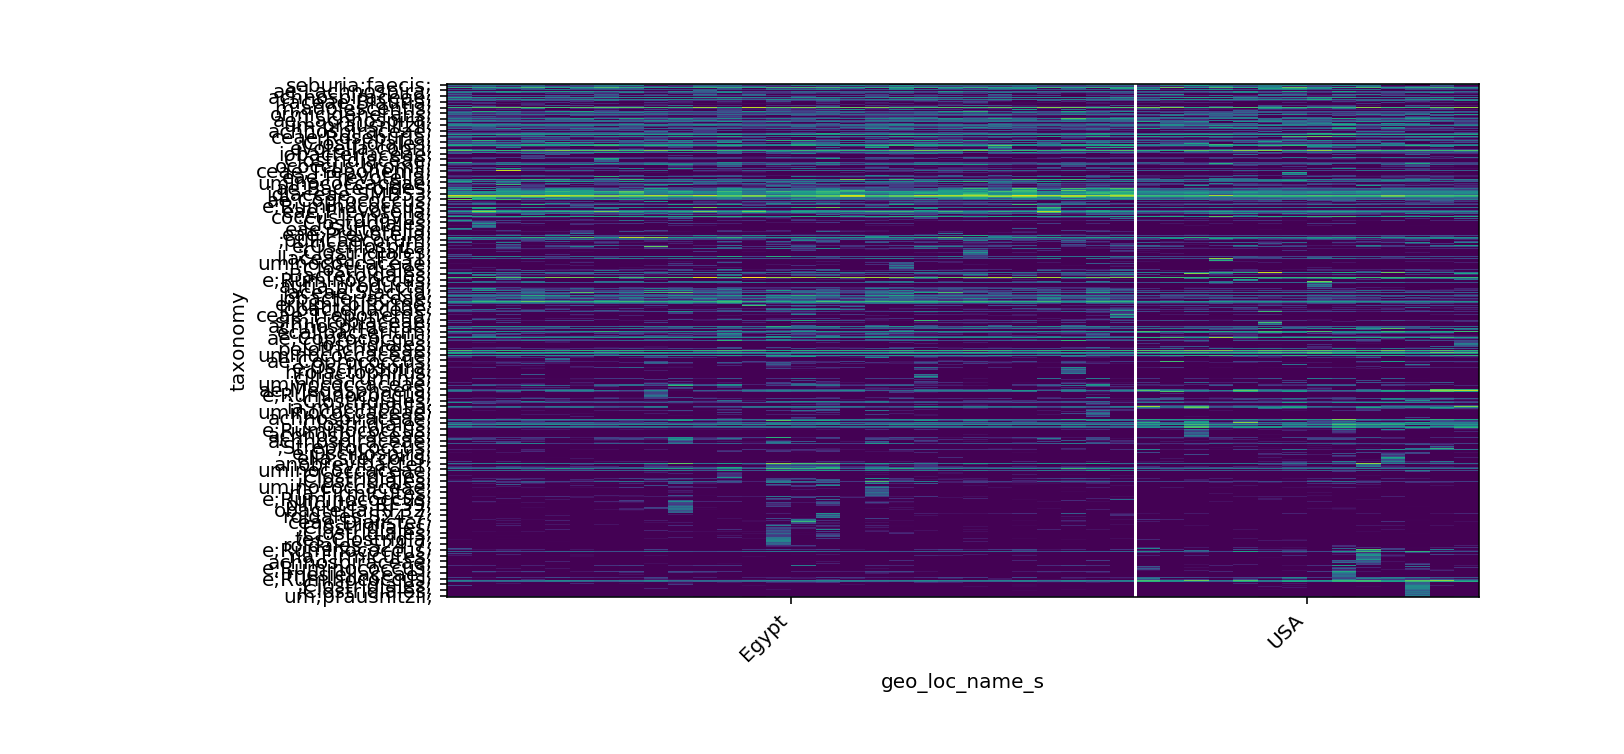

In [13]:
exp_c.plot_sort('geo_loc_name_s', gui='jupyter')

# Find bacteria different between USA and Egypt

In [14]:
dd = exp_c.diff_abundance('geo_loc_name_s','Egypt','USA')

2017-03-03 11:24:48 INFO 42 samples with both values
2017-03-03 11:24:48 INFO 28 samples with value 1 (['Egypt'])
2017-03-03 11:24:48 INFO method meandiff. number of higher in ['Egypt'] : 145. number of higher in ['USA'] : 92. total 237


## Look in the differntial bacteria using qt5 GUI

<IPython.core.display.Javascript object>


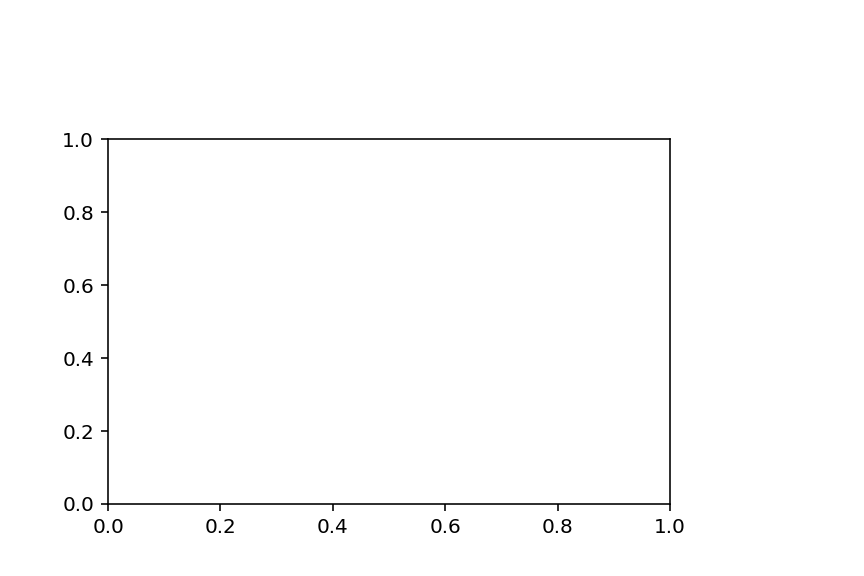

found 15


In [16]:
dd.plot_sort('geo_loc_name_s',gui='qt5')